# Lab03 Exploratory Data Analysis - EDA

STT: 11

Họ và tên: Nguyễn Mạnh Đức 

Lớp: DS105.N11.2

Buổi 02 - Bài 03 


# Câu 1

In [5]:
# Tạo dataframe (df) lưu trữ dataset tại đường dẫn trên (chọn cách đọc load từ
# internet). Xuất 10 samples bất kỳ. 
import pandas as pd

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/datasethub/ds105/master/EDA_automobile.csv")
df.sample(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
162,1,168,toyota,std,two,hatchback,rwd,front,94.5,0.810668,...,9.4,112.0,6600.0,26,29,9538,9.038462,Medium,0,1
50,1,113,mazda,std,four,sedan,fwd,front,93.1,0.801538,...,9.0,68.0,5000.0,31,38,6695,7.580645,Low,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.5,110.0,5500.0,19,25,15250,12.368421,Medium,0,1
100,0,108,nissan,std,four,sedan,fwd,front,100.4,0.887074,...,9.0,152.0,5200.0,19,25,13499,12.368421,Medium,0,1
103,1,231,nissan,std,two,hatchback,rwd,front,99.2,0.857761,...,9.0,160.0,5200.0,19,25,18399,12.368421,High,0,1
101,3,194,nissan,std,two,hatchback,rwd,front,91.3,0.820279,...,9.0,160.0,5200.0,19,25,17199,12.368421,High,0,1
140,0,102,subaru,std,four,sedan,4wd,front,97.0,0.826526,...,9.0,82.0,4800.0,24,25,9233,9.791667,Low,0,1
110,0,122,peugot,std,four,wagon,rwd,front,114.2,0.955790,...,8.4,95.0,5000.0,19,24,16695,12.368421,Low,0,1
141,0,102,subaru,turbo,four,sedan,4wd,front,97.0,0.826526,...,7.7,111.0,4800.0,24,29,11259,9.791667,Medium,0,1
67,-1,93,mercedes-benz,turbo,four,sedan,rwd,front,115.6,0.973570,...,21.5,123.0,4350.0,22,25,31600,10.681818,Medium,1,0


Dataset có 201 sample, 29 feature

# Câu 2

In [15]:
# Kiểm tra kiểu dữ liệu của các feature trong dataset. Dataset có bị khuyết giá trị nào không
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

Dataset không bị khuyết dữ liệu 

# Câu 3

In [23]:
# Tính correlation của các feature = ['bore', 'stroke', 'compression-ratio','horsepower']. 
# Nhận xét xem có mối quan hệ tương quan nào không?

df_corr = df[['bore', 'stroke', 'compression-ratio','horsepower']].corr()
df_corr

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055389,0.001263,0.566936
stroke,-0.055389,1.000000,0.187906,0.098237
compression-ratio,0.001263,0.187906,1.000000,-0.214514
horsepower,0.566936,0.098237,-0.214514,1.000000


horsepower và bore có độ tương quan ở mức trung bình (~ 56%)

Các cặp còn lại có độ tương quan thấp 

# Câu 4

Text(0.5, 0, 'Price')

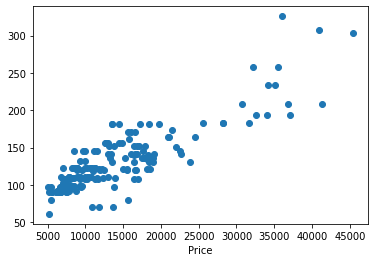

In [20]:
# Phát họa scatterplot của "engine-size" và "price"

import matplotlib.pyplot as plt

y = df['engine-size']
x = df['price']
plt.scatter(x,y)

plt.xlabel("Engine Size")
plt.xlabel("Price")

# Câu 5

In [36]:
# Xét toàn bộ dataset, tìm các feature (kiểu số) có correlation so với price có ảnh hưởng nhiều nhất (đồng thuận, hoặc không đồng thuận)

import seaborn as sns
numberical_df = df[['symboling','normalized-losses','wheel-base','length', 'width', 'height', 'engine-size', 'bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','city-L/100km','diesel','gas', 'price']]

numberical_df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,diesel,gas,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.110581,-0.140019,-0.008471,-0.182196,0.075819,0.279740,-0.035527,0.036233,0.066171,-0.196735,0.196735,-0.082391
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.112360,-0.029862,0.054883,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.238567,-0.101546,0.101546,0.133999
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.572027,0.493244,0.158124,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.476153,0.307237,-0.307237,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.685025,0.608971,0.124030,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.657373,0.211187,-0.211187,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.729436,0.544885,0.188838,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.673363,0.244356,-0.244356,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.074694,0.180449,-0.060348,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.003811,0.281578,-0.281578,0.135486
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,1.000000,0.572609,0.206170,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.745059,0.070779,-0.070779,0.872335
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.572609,1.000000,-0.055389,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.554610,0.054458,-0.054458,0.543155
stroke,-0.008471,0.054883,0.158124,0.124030,0.188838,-0.060348,0.206170,-0.055389,1.000000,0.187906,0.098237,-0.063902,-0.033713,-0.034427,0.035835,0.241125,-0.241125,0.082274
compression-ratio,-0.182196,-0.114713,0.250313,0.159733,0.189867,0.259737,0.028889,0.001263,0.187906,1.000000,-0.214514,-0.435780,0.331425,0.268465,-0.299372,0.985231,-0.985231,0.071107


In [37]:
numberical_df.corr()['price'].sort_values(ascending=False)

price                1.000000
engine-size          0.872335
horsepower           0.809575
city-L/100km         0.789898
width                0.751265
length               0.690628
wheel-base           0.584642
bore                 0.543155
height               0.135486
normalized-losses    0.133999
diesel               0.110326
stroke               0.082274
compression-ratio    0.071107
symboling           -0.082391
peak-rpm            -0.101616
gas                 -0.110326
city-mpg            -0.686571
highway-mpg         -0.704692
Name: price, dtype: float64

Các features có ảnh hưởng nhiều nhất tới price:

- Đồng thuận

        engine-size          0.872335

        curb-weight          0.834415

        horsepower           0.809575

        city-L/100km         0.789898

        width                0.751265

- Không đồng thuận

        highway-mpg         -0.704692

        city-mpg            -0.686571
    

# Câu 6

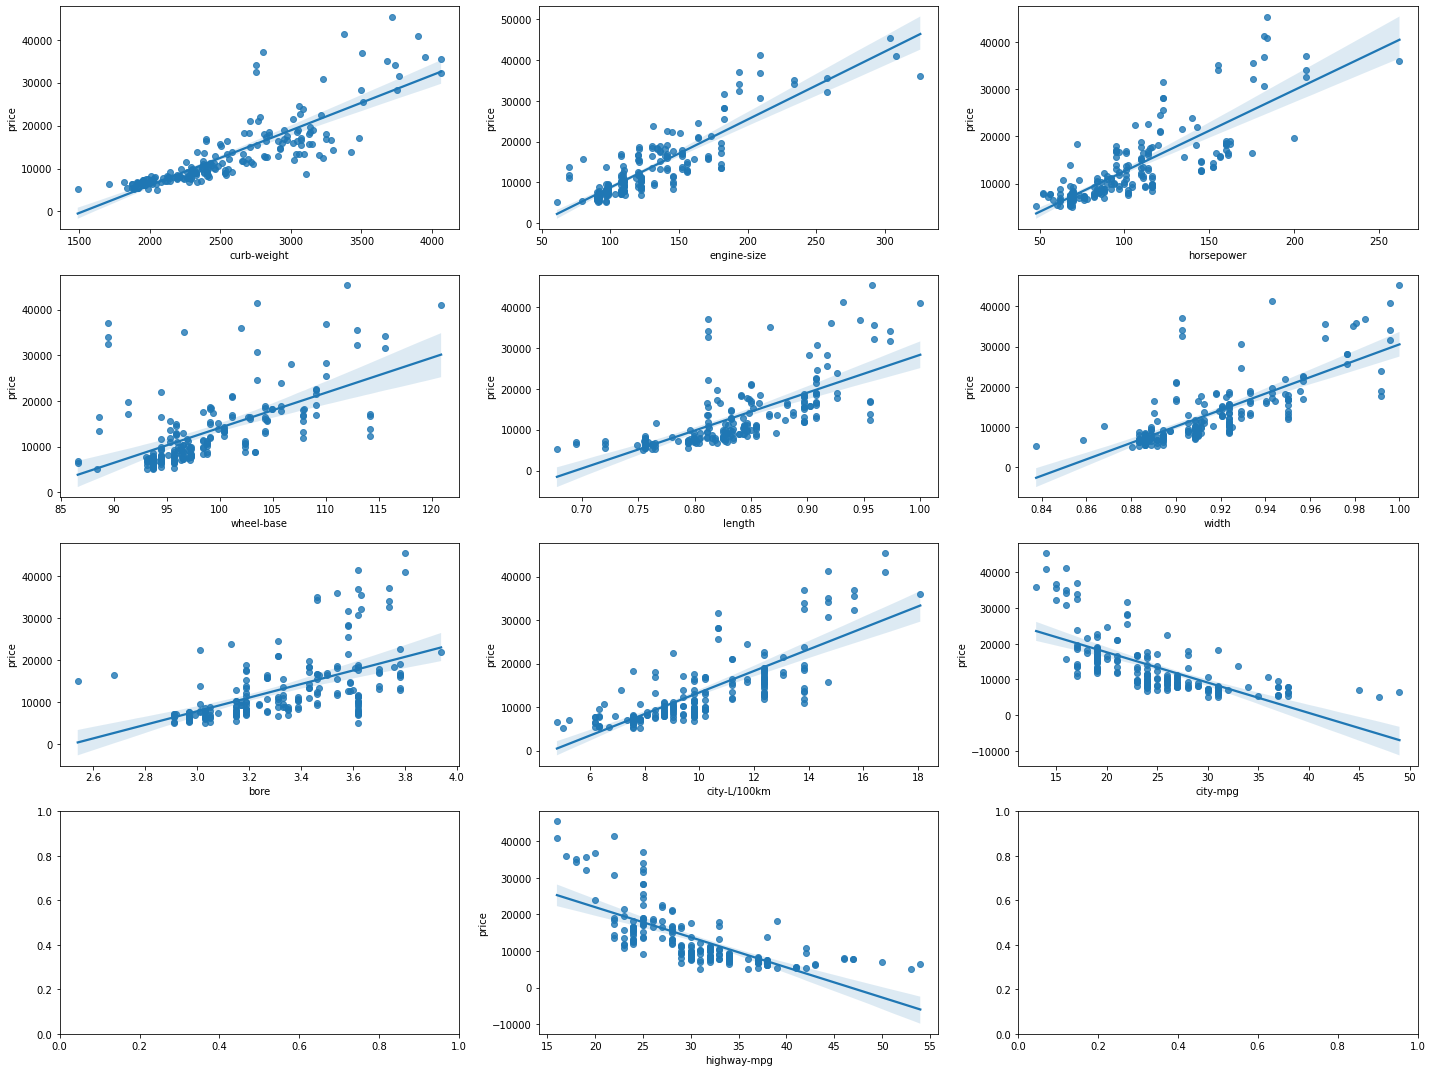

In [40]:
# Dùng seaborn để phát họa các regplot cho các feature đã tìm thấy

fig, axes = plt.subplots(4, 3, figsize=(20, 15))

sns.regplot(x=df['curb-weight'], y=df['price'], ax=axes[0,0])
sns.regplot(x=df['engine-size'], y=df['price'], ax=axes[0,1])
sns.regplot(x=df['horsepower'], y=df['price'], ax=axes[0,2])
sns.regplot(x=df['wheel-base'], y=df['price'], ax=axes[1,0])
sns.regplot(x=df['length'], y=df['price'], ax=axes[1,1])
sns.regplot(x=df['width'], y=df['price'], ax=axes[1,2])
sns.regplot(x=df['bore'], y=df['price'], ax=axes[2,0])
sns.regplot(x=df['city-L/100km'], y=df['price'], ax=axes[2,1])
sns.regplot(x=df['city-mpg'], y=df['price'], ax=axes[2,2])
sns.regplot(x=df['highway-mpg'], y=df['price'], ax=axes[3,1])
plt.tight_layout()
plt.show()


# Câu 7

In [ ]:
# Biến 'body-style' là loại biến gì? 
#Nếu là category thì đếm số lượng cho mỗi value. 
# Kết quả trả về là một df với index là các value.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

 Biến 'body-style' là loại biến object

In [50]:
body_style_counts = df['body-style'].value_counts().to_frame()
body_style_counts.index.name = 'body-style'
body_style_counts

,body-style
body-style,
sedan,94
hatchback,68
wagon,25
hardtop,8
convertible,6


# Câu 8

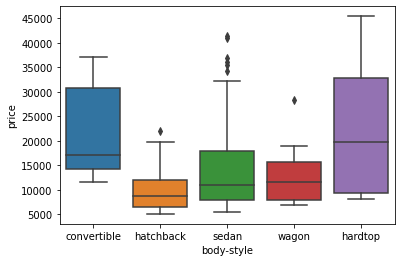

In [51]:
#  Phát họa các boxplot biểu diễn 'body-style' theo price.
import seaborn as sns
sns.boxplot(x="body-style", y ="price", data= df)

# Câu 9

In [52]:
# Trích lọc các sample nằm trong miền biến thiên về giá theo các giá trị trong 'body-style'

def body_style_non_outliers(body_style):
    col=body_style
    body_style=df[df['body-style']==col]
    q1=body_style['price'].describe().loc['25%']
    q3=body_style['price'].describe().loc['75%']
    iqr=q3-q1
    non_outliers=body_style[(body_style['price']>=q1-1.5*iqr) & (body_style['price']<=q3+1.5*iqr)]
    return non_outliers

In [53]:
body_style_non_outliers('convertible')

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500,11.190476,Medium,0,1
69,3,142,mercedes-benz,std,two,convertible,rwd,front,96.6,0.866410,...,8.3,155.0,4750.0,16,18,35056,14.687500,Medium,0,1
125,3,122,porsche,std,two,convertible,rwd,rear,89.5,0.811629,...,9.5,207.0,5900.0,17,25,37028,13.823529,High,0,1
168,2,134,toyota,std,two,convertible,rwd,front,98.4,0.846708,...,9.3,116.0,4800.0,24,30,17669,9.791667,Medium,0,1
185,3,122,volkswagen,std,two,convertible,fwd,front,94.5,0.765497,...,8.5,90.0,5500.0,24,29,11595,9.791667,Low,0,1


In [54]:
body_style_non_outliers('hatchback')  

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.00,154.0,5000.0,19,26,16500,12.368421,Medium,0,1
17,2,121,chevrolet,std,two,hatchback,fwd,front,88.4,0.678039,...,9.50,48.0,5100.0,47,53,5151,5.000000,Low,0,1
18,1,98,chevrolet,std,two,hatchback,fwd,front,94.5,0.749159,...,9.60,70.0,5400.0,38,43,6295,6.184211,Low,0,1
20,1,118,dodge,std,two,hatchback,fwd,front,93.7,0.755887,...,9.41,68.0,5500.0,37,41,5572,6.351351,Low,0,1
21,1,118,dodge,std,two,hatchback,fwd,front,93.7,0.755887,...,9.40,68.0,5500.0,31,38,6377,7.580645,Low,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,-1,65,toyota,std,four,hatchback,fwd,front,102.4,0.843825,...,8.70,92.0,4200.0,27,32,9988,8.703704,Low,0,1
173,-1,65,toyota,std,four,hatchback,fwd,front,102.4,0.843825,...,8.70,92.0,4200.0,27,32,11248,8.703704,Low,0,1
174,3,197,toyota,std,two,hatchback,rwd,front,102.9,0.881788,...,9.30,161.0,5200.0,20,24,16558,11.750000,High,0,1
175,3,197,toyota,std,two,hatchback,rwd,front,102.9,0.881788,...,9.30,161.0,5200.0,19,24,15998,12.368421,High,0,1


In [55]:
body_style_non_outliers('sedan')

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450,13.055556,Medium,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.5,110.0,5500.0,19,25,15250,12.368421,Medium,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,...,8.5,110.0,5500.0,19,25,17710,12.368421,Medium,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,...,8.3,140.0,5500.0,17,20,23875,13.823529,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470,9.038462,Medium,1,0


In [56]:
body_style_non_outliers('wagon')

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,...,8.5,110.000000,5500.000000,19,25,18920,12.368421,Medium,0,1
27,-1,110,dodge,std,four,wagon,fwd,front,103.3,0.839020,...,8.5,88.000000,5000.000000,24,30,8921,9.791667,Low,0,1
35,0,78,honda,std,four,wagon,fwd,front,96.5,0.754926,...,9.2,76.000000,6000.000000,30,34,7295,7.833333,Low,0,1
90,1,103,nissan,std,four,wagon,fwd,front,94.5,0.817876,...,9.4,69.000000,5200.000000,31,37,7349,7.580645,Low,0,1
94,1,103,nissan,std,four,wagon,fwd,front,94.5,0.817876,...,9.4,69.000000,5200.000000,31,37,7999,7.580645,Low,0,1
99,0,108,nissan,std,four,wagon,fwd,front,100.4,0.887074,...,9.0,152.000000,5200.000000,17,22,14399,13.823529,Medium,0,1
106,0,122,peugot,std,four,wagon,rwd,front,114.2,0.955790,...,8.4,97.000000,5000.000000,19,24,12440,12.368421,Low,0,1
107,0,122,peugot,turbo,four,wagon,rwd,front,114.2,0.955790,...,21.0,95.000000,4150.000000,25,25,13860,9.400000,Low,1,0
110,0,122,peugot,std,four,wagon,rwd,front,114.2,0.955790,...,8.4,95.000000,5000.000000,19,24,16695,12.368421,Low,0,1
111,0,122,peugot,turbo,four,wagon,rwd,front,114.2,0.955790,...,21.0,95.000000,4150.000000,25,25,17075,9.400000,Low,1,0


In [57]:
body_style_non_outliers('hardtop')  

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
66,0,93,mercedes-benz,turbo,two,hardtop,rwd,front,106.7,0.901009,...,21.5,123.0,4350.0,22,25,28176,10.681818,Medium,1,0
71,1,122,mercedes-benz,std,two,hardtop,rwd,front,112.0,0.957232,...,8.0,184.0,4500.0,14,16,45400,16.785714,High,0,1
95,2,168,nissan,std,two,hardtop,fwd,front,95.1,0.780394,...,9.4,69.0,5200.0,31,37,8249,7.580645,Low,0,1
123,3,122,porsche,std,two,hardtop,rwd,rear,89.5,0.811629,...,9.5,207.0,5900.0,17,25,32528,13.823529,High,0,1
124,3,122,porsche,std,two,hardtop,rwd,rear,89.5,0.811629,...,9.5,207.0,5900.0,17,25,34028,13.823529,High,0,1
163,2,134,toyota,std,two,hardtop,rwd,front,98.4,0.846708,...,9.3,116.0,4800.0,24,30,8449,9.791667,Medium,0,1
164,2,134,toyota,std,two,hardtop,rwd,front,98.4,0.846708,...,9.3,116.0,4800.0,24,30,9639,9.791667,Medium,0,1
166,2,134,toyota,std,two,hardtop,rwd,front,98.4,0.846708,...,9.3,116.0,4800.0,24,30,11199,9.791667,Medium,0,1


# Câu 10

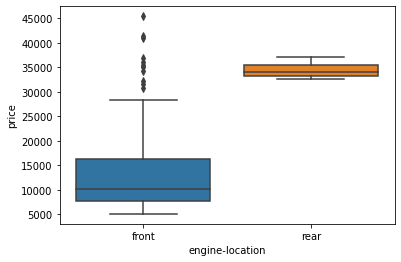

In [58]:
# Căn cứ vào giá xe, chúng ta có thể nhận xét gì về các nhóm giá trị trong “engine-location”

sns.boxplot(x='engine-location', y='price', data=df)

Nhận xét:
- Với vị trí đặt máy ở phía sau, giá nằm chủ yếu ở vùng 35000
- Với với vị trí máy ở phía trước, giá nằm chủ yếu ở dưới mức 16000

# Câu 11

In [61]:
# Tạo groupby các feature = ['drive-wheels', 'body-style'] theo trung bình giá

df_db = df[['drive-wheels', 'body-style','price']]
df_grp = df_db.groupby(['drive-wheels','body-style'], as_index = False).mean()

df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


# Câu 12

In [62]:
# Tạo bảng bảng pivot thể hiện trung bình giá, với index dòng là 'drive-wheels', index cột là 'body-style'

df_pivot = df_grp.pivot(index = 'drive-wheels', columns = 'body-style')

df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

# Câu 13

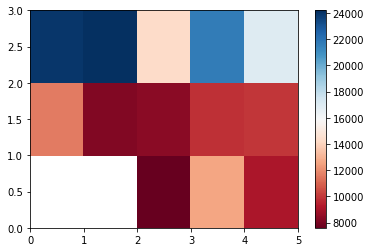

In [63]:
# Tạo heatmap thể hiện câu 12 (dùng mã màu là cmap='RdBu')

plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

# Câu 14

In [70]:
# Tính Pearson_correlation, P-value giữa 'wheel-base' và 'price' đưa ra nhận xét.

from scipy.stats import pearsonr
pearson_coef, p_value = pearsonr(df['wheel-base'], df['price'])
print(f'Pearsin coefficient between wheel-base and price: {pearson_coef}')
print(f'P-value: {p_value}')

Pearsin coefficient between wheel-base and price: 0.584641822265508
P-value: 8.076488270733218e-20


Nhận xét: Độ tương quan giữa 2 biến ở mức trung bình (~ 58%) 

P-value < 0.05 => hệ số tương quan ~58% đáng tin cậy 

# Câu 15

In [69]:
# Tính Pearson_correlation, P-value giữa 'length' và 'price' đưa ra nhận xét.

pearson_coef, p_value = pearsonr(df['length'], df['price'])
print(f'Pearsin coefficient between length and price: {pearson_coef}')
print(f'P-value: {p_value}')

Pearsin coefficient between length and price: 0.6906283810037585
P-value: 8.01647628992934e-30


Nhận xét: Độ tương quan giữa 2 biến khá tốt (~70%) 

P-value < 0.05 => hệ số tương quan 70% là đáng tin cậy 

# Câu 16

In [ ]:
# Tiếp tục phân tích thăm dò các feature còn lại, theo anh/chị những feature nào có ảnh hưởng nhất đến giá xe? 
# Trong đó, giải thích tại sao ảnh hưởng hoặc không ảnh hưởng

In [78]:
df.corr()['price']

symboling           -0.082391
normalized-losses    0.133999
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543155
stroke               0.082274
compression-ratio    0.071107
horsepower           0.809575
peak-rpm            -0.101616
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
city-L/100km         0.789898
diesel               0.110326
gas                 -0.110326
Name: price, dtype: float64

Pearson_correlation cho thấy các feature curb-weight, engine-size, horsepower, city-L/100km có ảnh hưởng nhất đến giá xe (~ 80% trở lên )

Pearson_correlation cho thấy các feature normalized-losses, symboling, height, stroke, compression-ratio, peak-rpm, diesel, gas không có ảnh hưởng nhiều đến giá xe ( ~ 10% ) 